In [72]:
import os 
import json
import glob 
import pandas as pd
from datetime import datetime, timezone, date
import requests
from IPython.display import clear_output
import random 
import time 
import numpy as np
import numpy as np
import matplotlib as plt

In [100]:
#  For now, the smash events matches are the only ones on the list :) So I will be using this file for master events from the date it was made

matches_file  = "../Obtain_data/Data/Processed/20251009_master_match_list.csv"
matches_df = pd.read_csv(matches_file)
valid_matches_df = matches_df[matches_df["MatchStatus"]=="Completed"]

players_file = "../Obtain_data/Data/Processed/Players/20251009_players.csv"
players_df = pd.read_csv(players_file)

print(len(players_df))

2087


In [96]:
if 'IttfId' not in players_df.columns:
    print("Error: 'IttfId' column not found in players_df. Please check your CSV file.")



Smash_win_rates = []


player_ids_to_process = players_df["IttfId"].tolist()

print("--- 🟢 Commencing Win Rate Calculation 🟢---")

for player_id in player_ids_to_process:

    # 1. Filter for all matches the player was involved in (as Player A OR Player B)
    mask_player = (valid_matches_df['PlayerA_ID'] == player_id) | (valid_matches_df['PlayerB_ID'] == player_id)
    mask_valid_points = valid_matches_df['PlayerA_TotalPoints'].notna() & valid_matches_df['PlayerB_TotalPoints'].notna()
    mask_finals = valid_matches_df["match_code"]
    
    mask_matches = mask_player & mask_valid_points
    
    player_matches_df = valid_matches_df[mask_matches]

    # 2. Filter the matches played to find only the wins
    player_wins_df = player_matches_df[player_matches_df['WinnerID'] == player_id]

    # 3. Calculate metrics
    total_matches = len(player_matches_df)
    wins = len(player_wins_df)
    losses = total_matches - wins

    # Calculate win rate, handling the case of 0 matches to avoid division by zero
    win_rate = (wins / total_matches) * 100 if total_matches > 0 else 0

    # 4. Get the player's name as a single string
    try:
        player_name = players_df[players_df['IttfId'] == player_id]['PlayerName'].iloc[0]
        player_style = players_df[players_df['IttfId'] == player_id]['Style'].iloc[0]
    except IndexError:
        player_name = f"ID {player_id} Not Found"


    is_player_A = player_matches_df['PlayerA_ID'] == player_id
    points_won_series = np.where(
        is_player_A,
        player_matches_df['PlayerA_TotalPoints'],
        player_matches_df['PlayerB_TotalPoints']
    )

    points_lost_series = np.where(
        is_player_A,
        player_matches_df['PlayerB_TotalPoints'],
        player_matches_df['PlayerA_TotalPoints']
    )

    total_points_won = points_won_series.sum()
    total_points_lost = points_lost_series.sum()
    total_points_played = total_points_won + total_points_lost

    points_win_rate = (total_points_won / total_points_played) * 100 if total_points_played > 0 else 0


    


    # 5. Populate and append the dictionary
    wins_dict = {
        "Name": player_name,
        "PlayerID": player_id,
        "Wins": wins,
        "Losses": losses,
        "Total Matches": total_matches,
        "Win %": round(win_rate, 1),
        "Total Points Won": int(total_points_won),
        "Total Points Lost": int(total_points_lost),
        "Total Points Played": int(total_points_played),
        "Points Win %": round(points_win_rate, 2),
        "Style" : player_style
    }

    Smash_win_rates.append(wins_dict)

  
print("--- 🟢 Finished Win Rate Calculation 🟢---")

win_rate_df = pd.DataFrame(Smash_win_rates)



--- 🟢 Commencing Win Rate Calculation 🟢---
--- 🟢 Finished Win Rate Calculation 🟢---


In [99]:
min_10_df = win_rate_df[win_rate_df["Total Matches"] >= 10]
min_10_df.sort_values(by = "Points Win %", ascending=False).head(20)

,Name,PlayerID,Wins,Losses,Total Matches,Win %,Total Points Won,Total Points Lost,Total Points Played,Points Win %,Style
906,Honoka HASHIMOTO,133000,63,12,75,84.0,2799,1915,4714,59.38,Defence
747,SUN Yingsha,131163,160,14,174,92.0,7780,5631,13411,58.01,Attack
1946,YAO Ruixuan,209007,8,3,11,72.7,355,257,612,58.01,Attack
590,Hitomi SATO,122261,61,21,82,74.4,2986,2176,5162,57.85,Defence
959,WANG Tianyi,133528,11,3,14,78.6,499,364,863,57.82,Attack
1147,Haruna OJIO,135179,28,9,37,75.7,1595,1173,2768,57.62,Defence
1429,Kyoka IDESAWA,144633,24,7,31,77.4,1148,870,2018,56.89,Attack
541,WANG Chuqin,121558,135,23,158,85.4,7024,5361,12385,56.71,Attack
167,CHEN Meng,112019,74,18,92,80.4,4071,3117,7188,56.64,Attack
1478,Ryuusei KAWAKAMI,145264,9,2,11,81.8,441,338,779,56.61,Attack


In [81]:
def generate_interactive_win_rate_plot(df):
    """
    Generates an interactive scatter plot comparing a player's Points Win Rate (X-axis)
    to their Match Win Rate (Y-axis), using Plotly for hover functionality.

    Players are colored and symbolized based on their 'Style'.

    Args:
        df (pd.DataFrame): The DataFrame containing player statistics,
                           must include 'Points Win %', 'Win %', 'Name', and 'Style'.

    Returns:
        plotly.graph_objects.Figure: The interactive plot figure.
    """
    import plotly.express as px
    import numpy as np

    # 1. Define X and Y axes
    X = df['Points Win %']
    Y = df['Win %']

    # 2. Define custom symbol map
    # Attack = cross, Defense = circle
    style_map = {
        'Attack': 'cross',
        'Defense': 'circle',
    }

    # 3. Create the scatter plot
    fig = px.scatter(
        df,
        x=X,
        y=Y,
        title='Player Performance: Win Rate vs. Points Win Rate',
        hover_name='Name',
        hover_data={
            'Points Win %': True,
            'Win %': True,
            'Outperformance Score': ':.2f',
            'Name': False,
            'Style': True
        },
        color='Style',
        symbol='Style',
        symbol_map=style_map,
        labels={
            'Points Win %': 'Total Points Win Rate (%)',
            'Win %': 'Match Win Rate (%)'
        },
        template='plotly_white'
    )

    # 4. Calculate Trend Line and R-squared
    z = np.polyfit(X, Y, 1)
    m, b = z[0], z[1]
    p = np.poly1d(z)
    
    # Calculate R-squared (Coefficient of Determination)
    y_pred = p(X)
    ss_res = np.sum((Y - y_pred)**2) # Sum of squares of the residuals
    ss_tot = np.sum((Y - np.mean(Y))**2) # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)
    
    # Create a line trace for the trend
    trend_label = f'Linear Trend: Y = {m:.1f}X + {b:.1f} (R² = {r_squared:.2f})'

    fig.add_scatter(
        x=X,
        y=y_pred,
        mode='lines',
        name=trend_label,
        line=dict(color='#FF5722', width=3)
    )

    # 5. Customize Layout and Axis Limits for minimal whitespace
    fig.update_layout(
        xaxis_title='Total Points Win Rate (%)',
        yaxis_title='Match Win Rate (%)',
        height=700,
        width=1000,
        legend_title="Player Style"
    )

    # Calculate dynamic limits (using 0-100 range with a 1-unit buffer)
    BUFFER_FACTOR = 1  # Changed from 5 to 1

    x_min_limit = max(0, X.min() - BUFFER_FACTOR)
    x_max_limit = min(100, X.max() + BUFFER_FACTOR)
    y_min_limit = max(0, Y.min() - BUFFER_FACTOR)
    y_max_limit = min(100, Y.max() + BUFFER_FACTOR)

    fig.update_xaxes(range=[x_min_limit, x_max_limit])
    fig.update_yaxes(range=[y_min_limit, y_max_limit])

    return fig

# Note: The code to call this function and display it (e.g., fig.show("notebook"))
# is assumed to be outside of the function definition.


In [82]:
X = min_10_df['Points Win %']
Y = min_10_df['Win %']

# --- 2. Calculate the Linear Trend Line Coefficients ---
# z = [m, b] where Y = mX + b (Linear Regression)
z = np.polyfit(X, Y, 1)
m, b = z[0], z[1]

# --- 3. Calculate Predicted Y and the Residual ---
# Predicted Y (Win % expected based on Points Win %)
min_10_df['Predicted Win %'] = m * X + b

# Residual (Actual Win % - Predicted Win %)
# A positive residual means the player is winning more matches than expected (clutch).
# A negative residual means the player is winning fewer matches than expected (unlucky).

min_10_df['Outperformance Score'] = min_10_df['Win %'] - min_10_df['Predicted Win %']


/tmp/ipykernel_18076/1414177750.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18076/1414177750.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
min_10_df.sort_values(by="Win %",ascending=False).head(10)
min_20_df = min_10_df[min_10_df["Total Matches"]>50]

In [92]:
sort_by = "Outperformance Score"
min_10_df.sort_values(by=sort_by,ascending=False).head(10)


,Name,PlayerID,Wins,Losses,Total Matches,Win %,Total Points Won,Total Points Lost,Total Points Played,Points Win %,Style,Predicted Win %,Outperformance Score
924,Maryam ALI,133314,0,10,10,0.0,91,352,443,20.54,Attack,-74.242314,74.242314
863,Muhannad AL BALUSHI,132462,0,10,10,0.0,153,340,493,31.03,Attack,-30.113094,30.113094
1868,Mahdi AHMADIAN,204499,0,13,13,0.0,208,450,658,31.61,Attack,-27.673156,27.673156
435,FAN Siqi,119529,48,10,58,82.8,2322,1963,4285,54.19,Attack,67.316148,15.483852
754,Elizabet ABRAAMIAN,131231,24,5,29,82.8,1170,987,2157,54.24,Attack,67.526488,15.273512
1602,Hanka KODET,200095,7,6,13,53.8,425,472,897,47.38,Attack,38.667913,15.132087
412,Yuki MATSUYAMA,118886,9,4,13,69.2,485,463,948,51.16,Attack,54.569576,14.630424
530,FAN Zhendong,121404,74,11,85,87.1,3902,3118,7020,55.58,Attack,73.163586,13.936414
1164,Rawad ALNASER,135383,3,8,11,27.3,261,369,630,41.43,Attack,13.637516,13.662484
318,PARK Chan-Hyeok,115559,10,4,14,71.4,549,508,1057,51.94,Attack,57.850872,13.549128


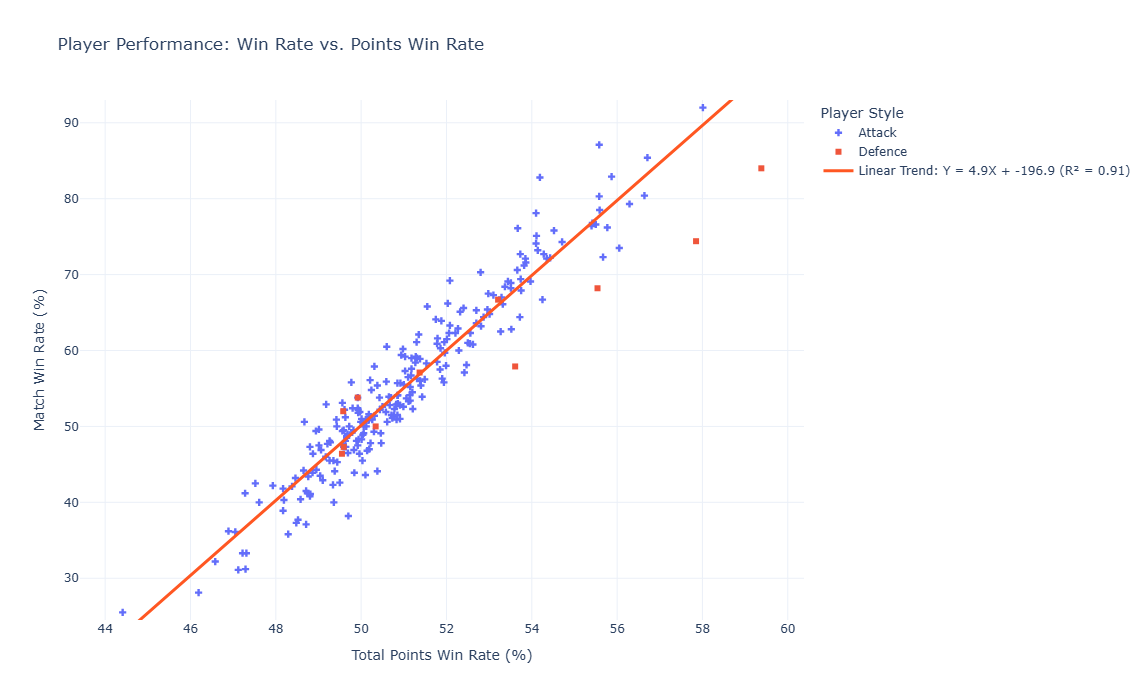